## Learning Goals for Lab 04
Functions and Visualization
- Functions
    - customize Python
    - syntax
        - def
        - return
     - arguments
     - local variables
- Visualization
    - datascience Table
        - plot
        - scatter
        - hist
     - arrays
         - from data columns
         - matplotlib
         - plotly

# Functions
Thousands of functions are built into the Python computer language and still others can be loaded by using the `import` Python command. This is very powerful and provides almost limitless capability to the Python language. However, there are many times when a custom function may be needed and this is a very powerful way to automate repetitive data handling and analysis tasks in a reproducible manner. Functions take arguments given in paretheses *()* directly following the name. For instance below is the built-in Python print function:

In [51]:
def double(x):
    """ doubles """
    return 2*x

In [52]:
?double

Signature: double(x)
Docstring: doubles 
File:      /tmp/ipykernel_134/3727432600.py
Type:      function

In [53]:
help(double)

Help on function double in module __main__:

double(x)
    doubles



In [54]:
def triple(xtra):
    """ triples """
    return 3*xtra

In [55]:
x = double(4)*triple(4)
x

96

# Applying functions to Tables

Suppose we were give a table of x1, y1, x2, y2 coordinates pairs.

In [56]:
from datascience import *
import numpy as np
%matplotlib inline

x1 = make_array(1, 3, 6, 0)
x2 = make_array(2, 4, 1, 4)
y1 = make_array(3, 5, 1, 0)
y2 = make_array(3, 2, 4, 3)
coordinate_pairs = Table().with_columns("x1", x1, "y1", y1, "x2", x2, "y2", y2)
coordinate_pairs

x1   | y1   | x2   | y2
1    | 3    | 2    | 3
3    | 5    | 4    | 2
6    | 1    | 1    | 4
0    | 0    | 4    | 3

Now suppose we want to add a column that contain the distance between the (x1, y1) and (x2, y2) pairs.

$$ distance = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $$

FIRST: Create a function to calculate distance.

In [57]:
def distance(x1, y1, x2, y2):
    """ 
    This function takes two pairs of (x,y) coordinates
    and calulates the Euclidean distance using the
    Pythagorean theorem.
    """
    delta_x = x1 - x2
    delta_y = y1 - y2
    dist = np.sqrt(delta_x**2 + delta_y**2)
    return dist

In [58]:
# Test our function with a 3, 4, 5 triangle
x1 = 0
x2 = 4
y1 = 0
y2 = 3
distance(x1, y1, x2, y2) # result should be 5

5.0

#### Now use apply to compute new Table column

In [59]:
coordinate_pairs = coordinate_pairs.with_columns(
    "distance", coordinate_pairs.apply(distance, 'x1', 'y1', 'x2', 'y2')
)

coordinate_pairs

x1   | y1   | x2   | y2   | distance
1    | 3    | 2    | 3    | 1
3    | 5    | 4    | 2    | 3.16228
6    | 1    | 1    | 4    | 5.83095
0    | 0    | 4    | 3    | 5

# Visualize

Let's look at data from the last quiz data


In [60]:
from matplotlib import pyplot as plt
%matplotlib inline

### scatter depicts relationship between two variables

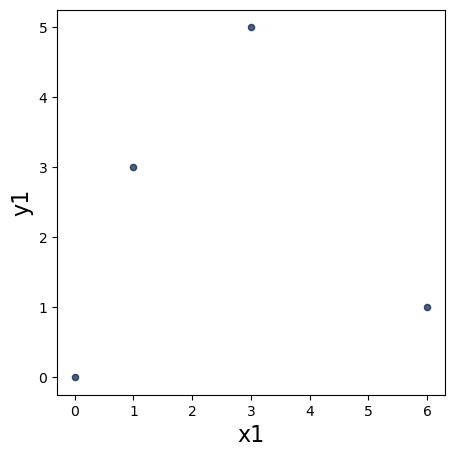

In [61]:
coordinate_pairs.scatter('x1', 'y1')

## Histograms

In [62]:
# Instead of using real names, we will use a python package that generates fake name.
# This is an excellent way to anonymize personal data.

!pip install faker

In [63]:
from faker import Faker
fake = Faker()
fake.name()

'Cheryl Jones'

In [64]:
names = []
for i in np.arange(28):
    names.append(fake.name())
names = np.array(names)
names

array(['Melissa Johnson', 'Erica Patel', 'Glenn Rogers', 'Daniel Griffin',
       'Mary Mills', 'Terry Bowman', 'Terry Williams', 'Kylie Lowery',
       'Jessica Fuller', 'Stephanie Glover', 'Colin Rogers',
       'Robert Dorsey', 'Jeanne Henry', 'Tonya Spears', 'Virginia Kim',
       'Daniel Andrade', 'Wesley Cruz', 'Sherry Smith',
       'Mrs. Patricia Powell', 'Jeff Perkins', 'Stefanie Mcdowell',
       'Jose Morales', 'Mary Vasquez', 'Mark Jimenez', 'Connie Ortega',
       'Dana Mccormick', 'Eric Ponce', 'Yvette Adams'],
      dtype='<U20')

In [65]:
scores = make_array(
    1.00,
    3.50,
    2.50,
    4.00,
    6.00,
    5.50,
    4.00,
    2.50,
    2.50,
    2.00,
    1.00,
    3.50,
    4.50,
    3.00,
    1.00,
    4.50,
    5.00,
    6.00,
    4.00,
    5.00,
    3.50,
    4.00,
    3.00,
    2.00,
    3.00,
    6.00,
    4.00,
    4.00
)

scores

array([ 1. ,  3.5,  2.5,  4. ,  6. ,  5.5,  4. ,  2.5,  2.5,  2. ,  1. ,
        3.5,  4.5,  3. ,  1. ,  4.5,  5. ,  6. ,  4. ,  5. ,  3.5,  4. ,
        3. ,  2. ,  3. ,  6. ,  4. ,  4. ])

In [66]:
quiz2 = Table().with_columns("Name", names, "Score", scores)
quiz2

Name             | Score
Melissa Johnson  | 1
Erica Patel      | 3.5
Glenn Rogers     | 2.5
Daniel Griffin   | 4
Mary Mills       | 6
Terry Bowman     | 5.5
Terry Williams   | 4
Kylie Lowery     | 2.5
Jessica Fuller   | 2.5
Stephanie Glover | 2
... (18 rows omitted)

In [67]:
quiz2.stats((np.min, np.max, np.mean, np.median, np.std))

statistic | Name | Score
amin      |      | 1
amax      |      | 6
mean      |      | 3.58929
median    |      | 3.75
std       |      | 1.43336

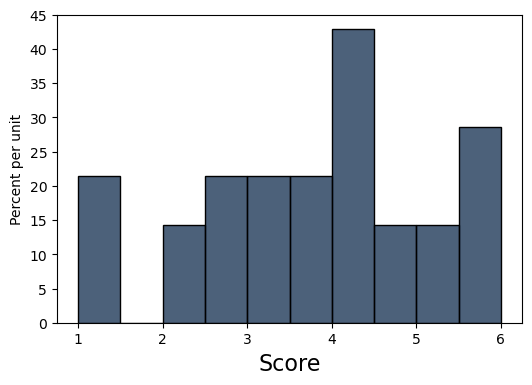

In [68]:
quiz2.hist('Score')

## To understand the units on the vertical scale
Read: https://www.stat.berkeley.edu/~stark/SticiGui/Text/histograms.htm

# Understanding function documentation
http://www.data8.org/datascience/_autosummary/datascience.tables.Table.hist.html

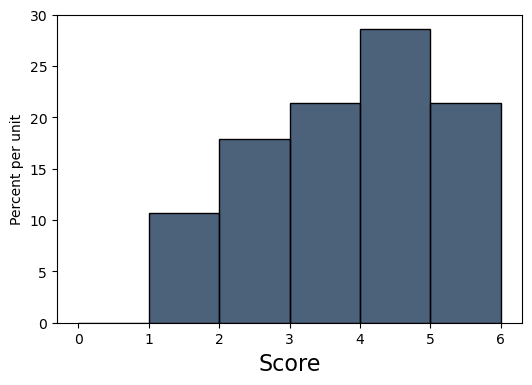

In [69]:
# Try one of the options shown in the documentation.
quiz2.hist('Score', bins = [0, 1, 2, 3, 4, 5, 6])

## Bar plot

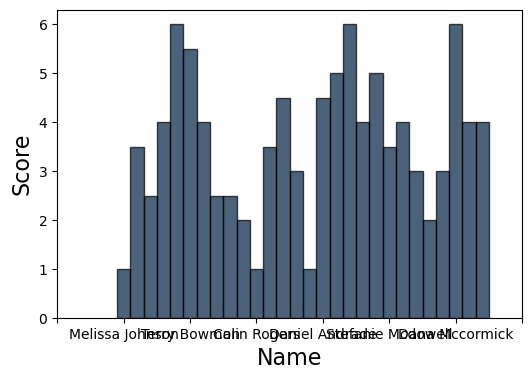

In [70]:
quiz2.bar('Name','Score')

[Text(-5.0, 0, ''),
 Text(0.0, 0, 'Melissa Johnson'),
 Text(5.0, 0, 'Terry Bowman'),
 Text(10.0, 0, 'Colin Rogers'),
 Text(15.0, 0, 'Daniel Andrade'),
 Text(20.0, 0, 'Stefanie Mcdowell'),
 Text(25.0, 0, 'Dana Mccormick'),
 Text(30.0, 0, '')]

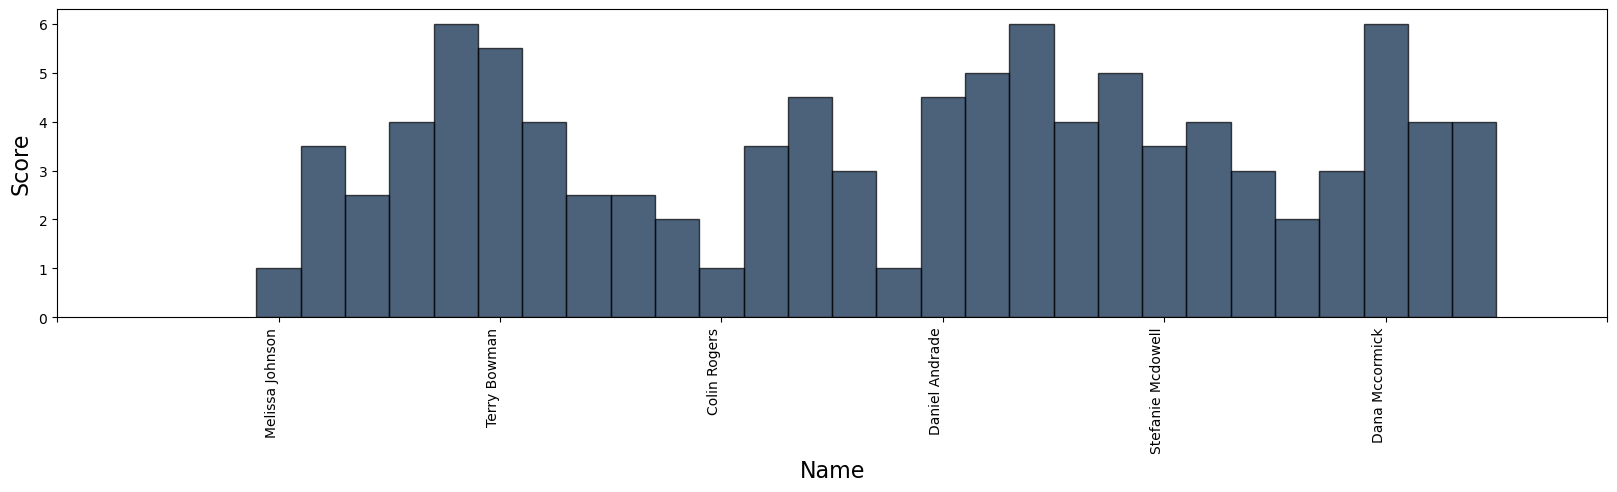

In [71]:
quiz2.bar('Name','Score', width=20)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

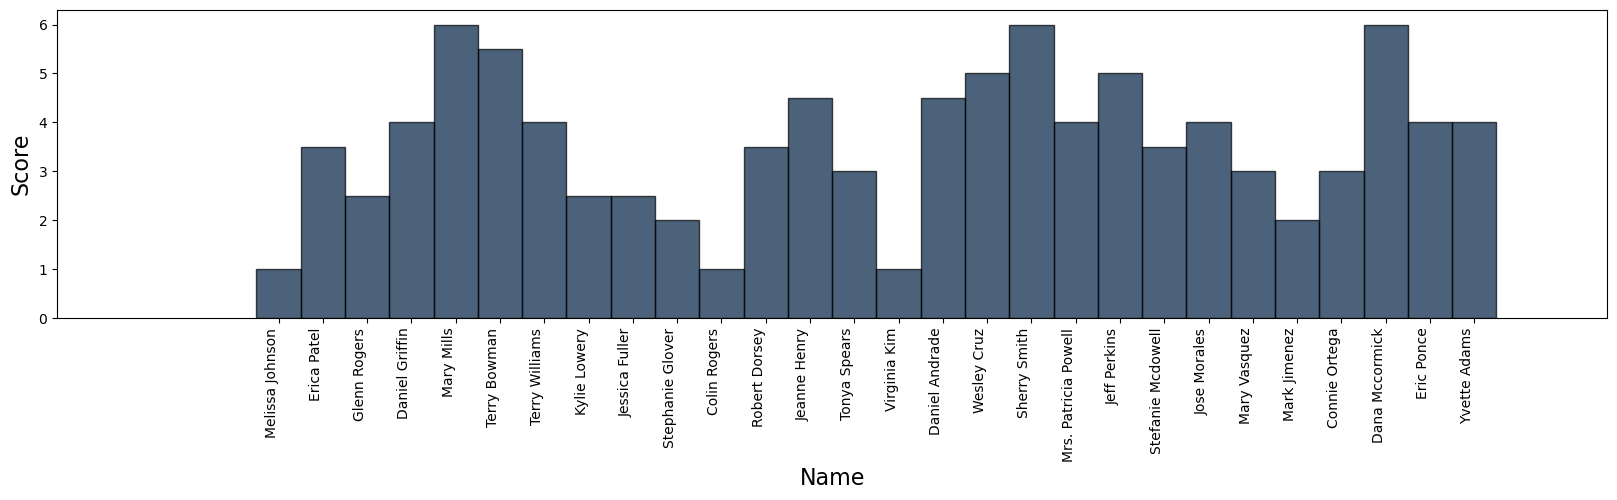

In [73]:
quiz2.bar('Name','Score', width=20)
ax = plt.gca()
ax.set_xticks(np.arange(len(quiz2.column('Name'))))
ax.set_xticklabels(names, rotation=90, ha='right');

In [78]:
quiz2_sorted = quiz2.sort('Score', descending=True)
quiz2_sorted

Name           | Score
Mary Mills     | 6
Sherry Smith   | 6
Dana Mccormick | 6
Terry Bowman   | 5.5
Wesley Cruz    | 5
Jeff Perkins   | 5
Jeanne Henry   | 4.5
Daniel Andrade | 4.5
Daniel Griffin | 4
Terry Williams | 4
... (18 rows omitted)

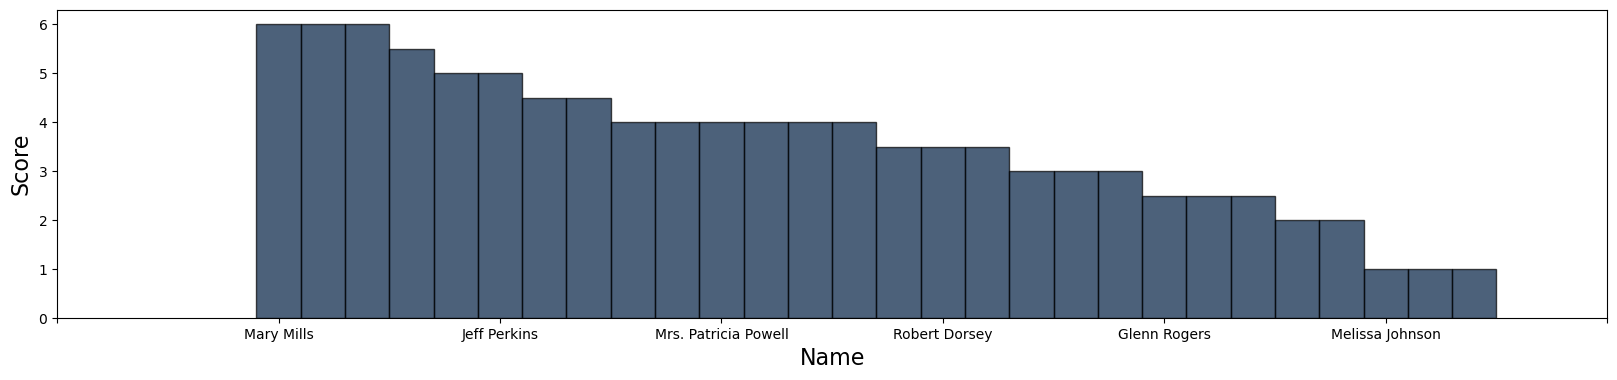

In [79]:
quiz2_sorted.bar('Name','Score', width=20)

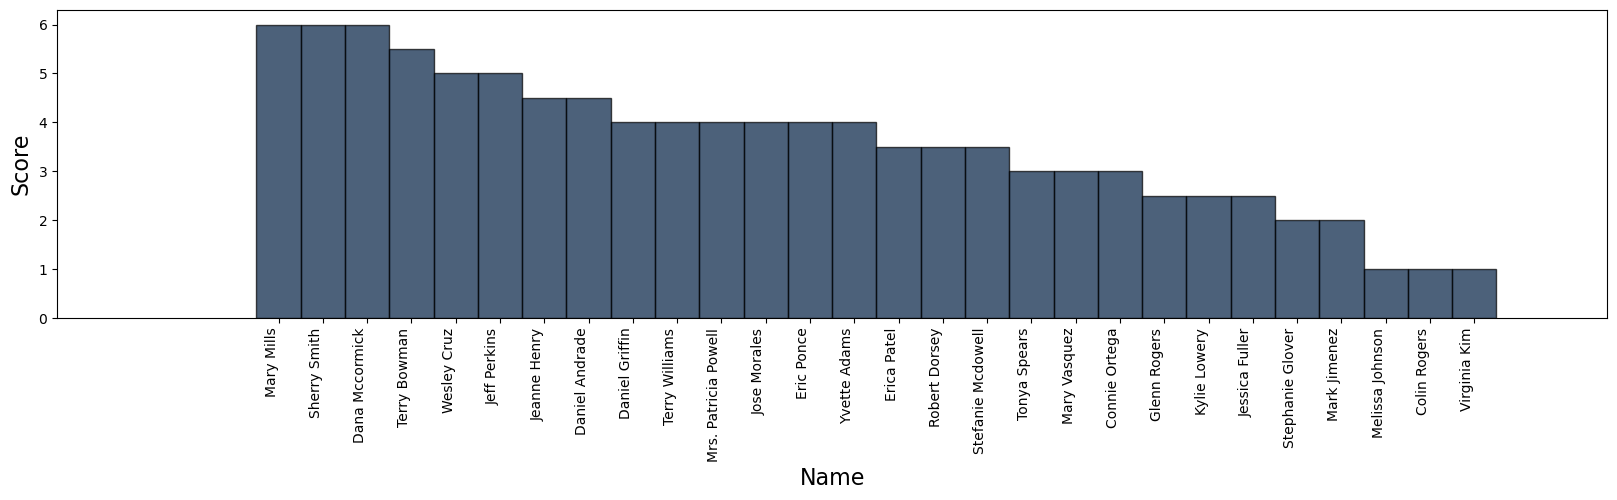

In [80]:
quiz2_sorted.bar('Name','Score', width=20)
names = quiz2_sorted.column('Name')
ax = plt.gca()
ax.set_xticks(np.arange(len(quiz2.column('Name'))))
ax.set_xticklabels(names, rotation=90, ha='right');